In [1]:
import pandas as pd
import numpy as np
import os
import ast
import xarray as xr
import matplotlib.pyplot as plt

#### Investigate hourly dataset

In [38]:
df_msg_nans = pd.read_csv('./raw-summary-files/msg_2020_miniset.csv')
df_goes_nans = pd.read_csv('./raw-summary-files/goes_2020_miniset.csv')

#### Investigate MSG Files

##### Add additional metrics to csv file

In [39]:
msg_dict = {}
for i, wvl in enumerate(ast.literal_eval(df_msg_nans["wavelengths"][0])):
    # print(i, wvl)
    values = [ast.literal_eval(df_msg_nans['nans'][x])[i] for x in range(len(df_msg_nans))]
    msg_dict[wvl] = values

In [40]:
for key in msg_dict.keys():
    min = np.min(msg_dict[key])
    max = np.max(msg_dict[key])
    median = np.median(msg_dict[key])
    print(f'{key}: min: {min}, max: {max}, median: {median}')

1.64: min: 3565259.0, max: 3565334.0, median: 3565259.0
3.92: min: 3565259.0, max: 3565261.0, median: 3565259.0
8.7: min: 3565259.0, max: 3565259.0, median: 3565259.0
9.66: min: 3565259.0, max: 3565259.0, median: 3565259.0
10.8: min: 3565259.0, max: 3565259.0, median: 3565259.0
12.0: min: 3565259.0, max: 3565259.0, median: 3565259.0
13.4: min: 3565259.0, max: 3565259.0, median: 3565259.0
0.64: min: 3565259.0, max: 3565279.0, median: 3565259.0
0.81: min: 3565259.0, max: 3565297.0, median: 3565259.0
6.25: min: 3565259.0, max: 3565259.0, median: 3565259.0
7.35: min: 3565259.0, max: 3565259.0, median: 3565259.0


In [41]:
# Correct format of nan column
nans_corr = df_msg_nans['nans'].apply(lambda x: ast.literal_eval(x))
df_msg_nans['nans'] = nans_corr

In [42]:
# normalize by substracting the border nan counts
nans_norm = df_msg_nans['nans'].apply(lambda x: [i - 3565259 for i in x])
df_msg_nans['nans_norm'] = nans_norm

In [43]:
# check which rows have >0 nans
nans_sum = df_msg_nans['nans_norm'].apply(lambda x: np.sum(x))
df_msg_nans['nans_sum'] = nans_sum

In [44]:
# calculate the total percentage of nans
nans_perc = df_msg_nans['nans'].apply(lambda x: (np.sum(x) - (3565259*11))/(11*3712*3712)*100)
df_msg_nans['nans_perc'] = nans_perc

In [45]:
# calculate the standard deviation of the nans
nans_std = df_msg_nans['nans'].apply(lambda x: np.std(x))
df_msg_nans['nans_std'] = nans_std

In [46]:
df_msg_nans.head()

,datetime,wavelengths,mean,std,max,min,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101005743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[0.145686, 0.380202, 43.60943, 39.273663, 74.6...","[1.265261, 0.228808, 15.045337, 11.810563, 22....","[18.616121, 3.556224, 69.45589, 63.00031, 110....","[0.0, 0.0, 2.408142, 8.316874, 6.561142, 10.00...","[3565259.0, 3565259.0, 3565259.0, 3565259.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0
1,20200101015744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[0.312408, 0.38829, 43.463512, 39.147575, 74.4...","[1.779292, 0.242063, 14.968102, 11.730471, 22....","[17.825924, 3.556224, 69.582634, 63.00031, 110...","[0.0, 0.0, 2.281397, 8.316874, 5.946034, 9.114...","[3565259.0, 3565259.0, 3565259.0, 3565259.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0
2,20200101025743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[0.522724, 0.400351, 43.382404, 39.0486, 74.32...","[2.026583, 0.248757, 14.886662, 11.633692, 21....","[18.221022, 3.461099, 69.70937, 62.89635, 111....","[0.0, 0.0, 2.281397, 8.420834, 6.356106, 10.00...","[3565259.0, 3565259.0, 3565259.0, 3565259.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0
3,20200101035743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[0.695465, 0.413608, 43.362305, 39.009678, 74....","[2.044643, 0.266582, 14.8266, 11.558887, 21.88...","[17.802683, 3.344022, 69.45589, 62.58447, 110....","[0.0, 0.0, 2.154653, 8.524796, 6.15107, 9.3370...","[3565259.0, 3565259.0, 3565259.0, 3565259.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0
4,20200101045744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[0.84302, 0.423126, 43.547703, 39.074238, 74.5...","[1.833567, 0.247757, 14.893943, 11.560601, 21....","[17.361101, 3.490368, 69.2024, 62.272587, 110....","[0.0, 0.0, 2.154653, 8.420834, 6.15107, 9.3370...","[3565259.0, 3565259.0, 3565259.0, 3565259.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0


In [47]:
files_with_nans = df_msg_nans[df_msg_nans['nans_sum'] > 0]

In [12]:
np.nanmin(files_with_nans['nans_sum']), np.nanmax(files_with_nans['nans_sum'])

(np.float64(1.0), np.float64(77.0))

In [16]:
np.nanmin(files_with_nans['nans_std']), np.nanmax(files_with_nans['nans_std'])

(np.float64(0.28747978728803447), np.float64(21.560984046602588))

In [17]:
np.nanmin(files_with_nans['nans_perc']), np.nanmax(files_with_nans['nans_perc'])

(np.float64(6.597682007350557e-07), np.float64(5.080215145659929e-05))

In [13]:
files_with_nans.loc[files_with_nans['nans_std'].idxmax()]

datetime                                          20200128225743
wavelengths    [1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...
mean           [0.164272, 0.398796, 44.43836, 40.076427, 75.9...
std            [1.327681, 0.24237, 15.382452, 12.177932, 22.7...
max            [20.010588, 3.483051, 68.948906, 61.648823, 11...
min            [0.0, 0.0, 3.041864, 9.668365, 7.586319, 10.89...
nans           [3565334.0, 3565259.0, 3565259.0, 3565259.0, 3...
nans_norm      [75.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
nans_sum                                                    75.0
nans_perc                                               0.000049
nans_std                                               21.560984
Name: 67, dtype: object

In [18]:
files_with_nans.loc[files_with_nans['nans_sum'].idxmax()]

datetime                                          20200101225743
wavelengths    [1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...
mean           [0.220513, 0.393134, 43.58988, 39.148212, 74.4...
std            [1.605636, 0.277541, 15.425369, 11.817273, 22....
max            [19.847898, 3.556224, 69.70937, 62.89635, 110....
min            [0.0, 0.0, 2.027909, 8.420834, 5.535963, 8.447...
nans           [3565313.0, 3565261.0, 3565259.0, 3565259.0, 3...
nans_norm      [54.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 1.0...
nans_sum                                                    77.0
nans_perc                                               0.000051
nans_std                                               15.903116
Name: 22, dtype: object

In [14]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.003]
files_with_many_nans

,datetime,wavelengths,mean,std,max,min,nans,nans_norm,nans_sum,nans_perc,nans_std


In [15]:
files_with_many_nans = files_with_nans[files_with_nans['nans_std'] > 1000]
files_with_many_nans

,datetime,wavelengths,mean,std,max,min,nans,nans_norm,nans_sum,nans_perc,nans_std


In [156]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.1]
files_with_many_nans

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc
3377,20201012115743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[4845128, 4811124, 5134701, 4868385, 5153245, ...","[1279869, 1245865, 1569442, 1303126, 1587986, ...",14260610,9.408697


In [48]:
df_msg_nans.to_csv('./raw-summary-files/msg_2020_miniset.csv', index=False)

Conclusion: The files in the miniset are completely fine.

##### Visualize files with nans

In [22]:
path = '/mnt/disks/eo-miniset/geoprocessed/msg'
file = '20200101225743_msg.nc'

ds = xr.open_dataset(os.path.join(path, file))

c, h, w = ds.Rad.shape

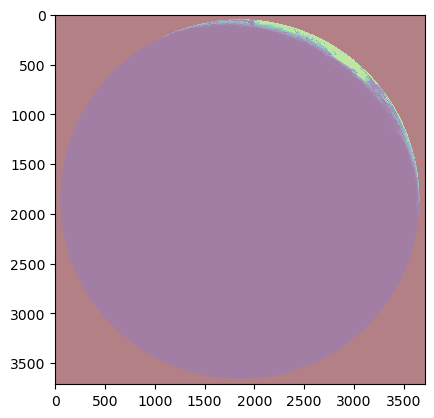

In [23]:
n = 0
# plot areas with nans
plt.imshow(np.isnan(ds.Rad.values[n]), cmap='Reds', interpolation='none', alpha=0.5)
plt.imshow(ds.Rad.values[n], interpolation='none', alpha=0.5)

#### Investigate GOES Files

##### Add additional metrics to csv file

In [3]:
goes_dict = {}
for i, wvl in enumerate(ast.literal_eval(df_goes_nans["wavelengths"][0])):
    # print(i, wvl)
    values = [ast.literal_eval(df_goes_nans['nans'][x])[i] for x in range(len(df_goes_nans))]
    goes_dict[wvl] = values

In [4]:
mins = []
for key in goes_dict.keys():
    min = np.min(goes_dict[key])
    max = np.max(goes_dict[key])
    median = np.median(goes_dict[key])
    mins.append(min.item())
    print(f'{key}: min: {min}, max: {max}, median: {median}')

0.47: min: 25494494.0, max: 40275675.0, median: 25495635.0
0.64: min: 25505091.0, max: 37975213.0, median: 25505403.0
0.87: min: 25516133.0, max: 40304651.0, median: 25517215.0
1.38: min: 25537064.0, max: 40332452.0, median: 25537508.0
1.61: min: 25516953.0, max: 40305983.0, median: 25519407.0
2.25: min: 25537268.0, max: 40333396.0, median: 25538536.0
3.89: min: 25536976.0, max: 38915316.0, median: 25537924.0
6.17: min: 25537000.0, max: 38914420.0, median: 25537896.0
6.93: min: 25536964.0, max: 40333024.0, median: 25537860.0
7.34: min: 25536968.0, max: 38915332.0, median: 25537872.0
8.44: min: 25537040.0, max: 40332356.0, median: 25537476.0
9.61: min: 25537220.0, max: 40333000.0, median: 25538180.0
10.33: min: 25536964.0, max: 40332728.0, median: 25537968.0
11.19: min: 25536968.0, max: 38915056.0, median: 25537880.0
12.27: min: 25536968.0, max: 38914988.0, median: 25538136.0
13.27: min: 25536964.0, max: 38914788.0, median: 25537468.0


In [5]:
# Correct format of nan column
nans_corr = df_goes_nans['nans'].apply(lambda x: ast.literal_eval(x))
df_goes_nans['nans'] = nans_corr

In [6]:
# normalize by substracting the border nan counts
# specific to each channel, since there is no common minimum across all channels
nans_norm = df_goes_nans['nans'].apply(lambda x: [num - mins[i] for i, num in enumerate(x)])
df_goes_nans['nans_norm'] = nans_norm

In [7]:
df_goes_nans.head()

,datetime,wavelengths,mean,std,max,min,nans,nans_norm
0,20200101010021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[28.17287, 19.230104, 13.662127, 0.659672, 2.7...","[71.068054, 52.85272, 38.531075, 3.438498, 8.0...","[804.0361, 628.6211, 372.8076, 62.582947, 95.0...","[-0.761351, -0.761351, -3.197668, 0.050756, -0...","[25498063.0, 25505136.0, 25520635.0, 25538684....","[3569.0, 45.0, 4502.0, 1620.0, 5820.0, 2384.0,..."
1,20200101020021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[18.70143, 13.746138, 10.466713, 0.583549, 2.2...","[64.644516, 50.588676, 38.811855, 3.69951, 8.4...","[804.0361, 628.6211, 372.8076, 83.697716, 95.0...","[-0.761351, -0.761351, -6.446094, 0.050756, -0...","[25497662.0, 25505148.0, 25519775.0, 25538220....","[3168.0, 57.0, 3642.0, 1156.0, 4888.0, 1856.0,..."
2,20200101030021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[10.901764, 8.560375, 7.047772, 0.550558, 1.59...","[56.112347, 46.302544, 37.411343, 4.44507, 8.5...","[804.0361, 628.6211, 372.8076, 126.73935, 95.0...","[-0.761351, -0.761351, -3.197668, 0.050756, -0...","[25496786.0, 25505143.0, 25518615.0, 25537856....","[2292.0, 52.0, 2482.0, 792.0, 4311.0, 1588.0, ..."
3,20200101040021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[4.710412, 3.820999, 3.522161, 0.30742, 0.8788...","[37.784977, 32.416897, 28.635727, 3.377556, 7....","[804.0361, 628.6211, 372.8076, 140.54517, 95.0...","[-0.761351, -0.761351, -0.761351, -0.761351, -...","[25495949.0, 25505134.0, 25517508.0, 25537480....","[1455.0, 43.0, 1375.0, 416.0, 2912.0, 1288.0, ..."
4,20200101050021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2.747972, 2.29195, 2.341415, 0.122576, 0.6037...","[26.675056, 23.88228, 23.828272, 1.202561, 6.0...","[804.0361, 628.6211, 372.8076, 105.624596, 95....","[-0.761351, -0.761351, -0.761351, 0.050756, -0...","[25495491.0, 25505205.0, 25517093.0, 25537336....","[997.0, 114.0, 960.0, 272.0, 2454.0, 1004.0, 9..."


In [8]:
# check which rows have >0 nans
nans_sum = df_goes_nans['nans_norm'].apply(lambda x: np.sum(x))
df_goes_nans['nans_sum'] = nans_sum

In [9]:
# calculate the total percentage of nans
nans_perc = df_goes_nans['nans'].apply(lambda x: (np.sum(x) - (np.sum(mins)))/(16*10848*10848)*100)
df_goes_nans['nans_perc'] = nans_perc

In [10]:
# calculate the standard deviation of the nans
nans_std = df_goes_nans['nans'].apply(lambda x: np.std(x))
df_goes_nans['nans_std'] = nans_std

In [11]:
df_goes_nans.head()

,datetime,wavelengths,mean,std,max,min,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101010021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[28.17287, 19.230104, 13.662127, 0.659672, 2.7...","[71.068054, 52.85272, 38.531075, 3.438498, 8.0...","[804.0361, 628.6211, 372.8076, 62.582947, 95.0...","[-0.761351, -0.761351, -3.197668, 0.050756, -0...","[25498063.0, 25505136.0, 25520635.0, 25538684....","[3569.0, 45.0, 4502.0, 1620.0, 5820.0, 2384.0,...",36580.0,0.001943,12928.922105
1,20200101020021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[18.70143, 13.746138, 10.466713, 0.583549, 2.2...","[64.644516, 50.588676, 38.811855, 3.69951, 8.4...","[804.0361, 628.6211, 372.8076, 83.697716, 95.0...","[-0.761351, -0.761351, -6.446094, 0.050756, -0...","[25497662.0, 25505148.0, 25519775.0, 25538220....","[3168.0, 57.0, 3642.0, 1156.0, 4888.0, 1856.0,...",30359.0,0.001612,12941.694532
2,20200101030021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[10.901764, 8.560375, 7.047772, 0.550558, 1.59...","[56.112347, 46.302544, 37.411343, 4.44507, 8.5...","[804.0361, 628.6211, 372.8076, 126.73935, 95.0...","[-0.761351, -0.761351, -3.197668, 0.050756, -0...","[25496786.0, 25505143.0, 25518615.0, 25537856....","[2292.0, 52.0, 2482.0, 792.0, 4311.0, 1588.0, ...",38169.0,0.002027,13697.923321
3,20200101040021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[4.710412, 3.820999, 3.522161, 0.30742, 0.8788...","[37.784977, 32.416897, 28.635727, 3.377556, 7....","[804.0361, 628.6211, 372.8076, 140.54517, 95.0...","[-0.761351, -0.761351, -0.761351, -0.761351, -...","[25495949.0, 25505134.0, 25517508.0, 25537480....","[1455.0, 43.0, 1375.0, 416.0, 2912.0, 1288.0, ...",25629.0,0.001361,13602.570515
4,20200101050021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2.747972, 2.29195, 2.341415, 0.122576, 0.6037...","[26.675056, 23.88228, 23.828272, 1.202561, 6.0...","[804.0361, 628.6211, 372.8076, 105.624596, 95....","[-0.761351, -0.761351, -0.761351, 0.050756, -0...","[25495491.0, 25505205.0, 25517093.0, 25537336....","[997.0, 114.0, 960.0, 272.0, 2454.0, 1004.0, 9...",11737.0,0.000623,13181.746079


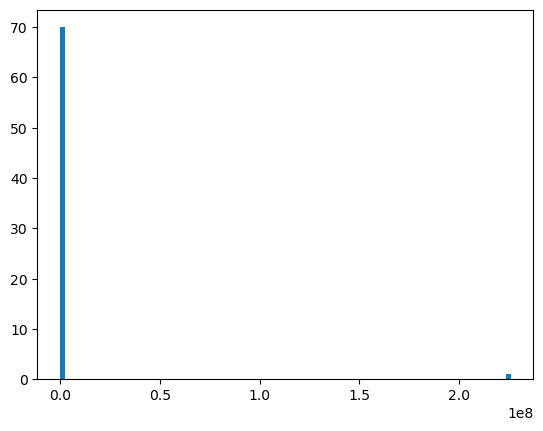

In [57]:
plt.hist(df_goes_nans['nans_sum'], bins=100);

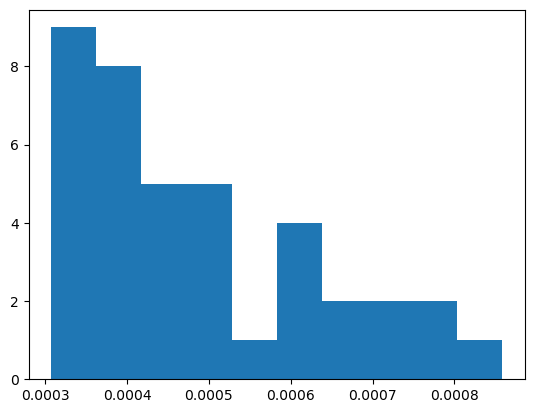

In [59]:
plt.hist(df_goes_nans['nans_perc'][df_goes_nans['nans_sum'] <20000], bins=10);

In [12]:
len(df_goes_nans), len(df_goes_nans[df_goes_nans['nans_sum'] > 0])

(71, 71)

In [13]:
files_with_nans = df_goes_nans[df_goes_nans['nans_sum'] > 0]

In [14]:
np.nanmin(files_with_nans['nans_sum']), np.nanmax(files_with_nans['nans_sum'])

(np.float64(5782.0), np.float64(225871343.0))

In [15]:
files_with_nans.loc[files_with_nans['nans_sum'].idxmin()]

datetime                                          20200128090015
wavelengths    [0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...
mean           [27.26722, 19.539532, 14.212559, 0.936703, 2.8...
std            [69.71693, 52.5941, 38.613705, 3.637234, 8.124...
max            [505.1809, 456.45453, 372.8076, 74.76454, 91.0...
min            [-0.761351, -0.761351, -0.761351, 0.050756, -1...
nans           [25494494.0, 25505462.0, 25516152.0, 25537236....
nans_norm      [0.0, 371.0, 19.0, 172.0, 0.0, 28.0, 884.0, 88...
nans_sum                                                  5782.0
nans_perc                                               0.000307
nans_std                                            13455.978097
Name: 56, dtype: object

In [16]:
files_with_nans.loc[files_with_nans['nans_sum'].idxmax()]

datetime                                          20200128150015
wavelengths    [0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...
mean           [156.6738, 93.62253, 67.57898, 2.579854, 10.79...
std            [114.58724, 89.98616, 62.41477, 6.654512, 9.62...
max            [804.0361, 628.6211, 372.8076, 83.697716, 86.1...
min            [-0.761351, -0.761351, -4.009775, -0.761351, -...
nans           [40275675.0, 37975213.0, 40304651.0, 40332452....
nans_norm      [14781181.0, 12470122.0, 14788518.0, 14795388....
nans_sum                                             225871343.0
nans_perc                                              11.996148
nans_std                                           794280.421761
Name: 62, dtype: object

In [23]:
files_with_nans.to_csv('./raw-summary-files/goes_2020_miniset (with nans).csv', index=False)

In [17]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.003]
# files_with_many_nans = files_with_many_nans[files_with_many_nans['nans_perc'] < 0.003]
# print(len(files_with_many_nans))
# print(files_with_many_nans.iloc[files_with_many_nans['nans_perc'].idxmax()])
files_with_many_nans

,datetime,wavelengths,mean,std,max,min,nans,nans_norm,nans_sum,nans_perc,nans_std
17,20200101180021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[163.19606, 95.94892, 65.91873, 3.125714, 10.3...","[112.73856, 90.99852, 62.059727, 7.625546, 9.3...","[804.0361, 628.6211, 372.8076, 80.44929, 72.32...","[-0.761351, -0.761351, -4.821882, -0.761351, -...","[25606622.0, 25506573.0, 25634742.0, 25537924....","[112128.0, 1482.0, 118609.0, 860.0, 2912.0, 16...",249295.0,0.013240,30119.375906
18,20200101190021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[142.02254, 84.14896, 57.78494, 2.835399, 9.05...","[108.80195, 85.62584, 57.864834, 7.051082, 8.8...","[804.0361, 628.6211, 372.8076, 78.82507, 95.06...","[-0.761351, -0.761351, -4.821882, -0.761351, -...","[25497041.0, 25506513.0, 25519121.0, 25538220....","[2547.0, 1422.0, 2988.0, 1156.0, 3857.0, 1172....",89850.0,0.004772,17149.774126
40,20200102170021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[171.63304, 100.5161, 69.36291, 2.850214, 11.0...","[113.90512, 92.99707, 64.083984, 7.044226, 9.6...","[804.0361, 628.6211, 372.8076, 80.44929, 95.06...","[0.050756, -0.761351, -4.821882, -0.761351, -1...","[25495635.0, 25506573.0, 25517282.0, 25537456....","[1141.0, 1482.0, 1149.0, 392.0, 1954.0, 1396.0...",477798.0,0.025376,114003.945788
62,20200128150015,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[156.6738, 93.62253, 67.57898, 2.579854, 10.79...","[114.58724, 89.98616, 62.41477, 6.654512, 9.62...","[804.0361, 628.6211, 372.8076, 83.697716, 86.1...","[-0.761351, -0.761351, -4.009775, -0.761351, -...","[40275675.0, 37975213.0, 40304651.0, 40332452....","[14781181.0, 12470122.0, 14788518.0, 14795388....",225871343.0,11.996148,794280.421761
70,20200128230015,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[49.06197, 29.06142, 19.126112, 0.843584, 3.38...","[74.7826, 51.234074, 34.59308, 3.507312, 5.893...","[596.13684, 449.14557, 283.4759, 69.89191, 43....","[-1.573456, -0.761351, -4.821882, -1.573456, -...","[25499063.0, 25505153.0, 25528930.0, 25545524....","[4569.0, 62.0, 12797.0, 8460.0, 5915.0, 2480.0...",56543.0,0.003003,12871.916174


In [35]:
# Remove csv file
from tqdm import tqdm

df_filter = files_with_many_nans.set_index('datetime')
df_norm = df_goes_nans.copy()
df_norm = df_norm.set_index('datetime')

# remove all indexes in df_filter from df_norm
df_norm = df_norm[~df_norm.index.isin(df_filter.index)]
df_norm.reset_index(inplace=True)

In [37]:
df_norm.to_csv('./raw-summary-files/goes_2020_miniset.csv', index=False)

Conclusion 1: There is no standard minimum across spectral channels. I am therefore normalizing everything by the individual minima per channel. This means, however, that pretty much every file has a nan_count > 0, making it harder to filter.

Conclusion 2: There are some files with complete or half channels missing.

Conclusion 3: After manual filtering and inspecting, I found that a nan_perc cut-off of smaller than 0.003% seems to avoid any obvious artifacts. The nan_std is not such useful metric for the GOES subset, since the spread is much larger than MSG (likley due to lack of a consistent minimum).

##### Visualize files with nans

In [49]:
path = '/mnt/disks/eo-miniset/geoprocessed/goes'
file = '20200101200021_goes16.nc'

ds = xr.open_dataset(os.path.join(path, file))

c, h, w = ds.Rad.shape

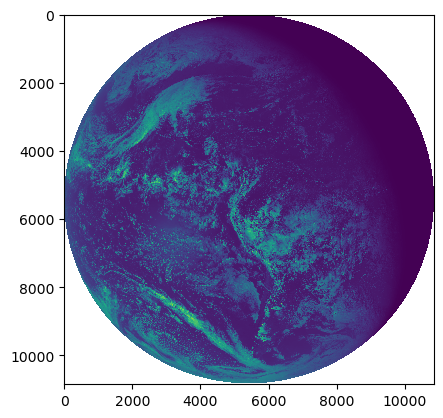

In [50]:
n = 0
# plot areas with nans
# plt.imshow(np.isnan(ds.Rad.values[n]), cmap='Reds', interpolation='none')
plt.imshow(ds.Rad.values[n], interpolation='none')